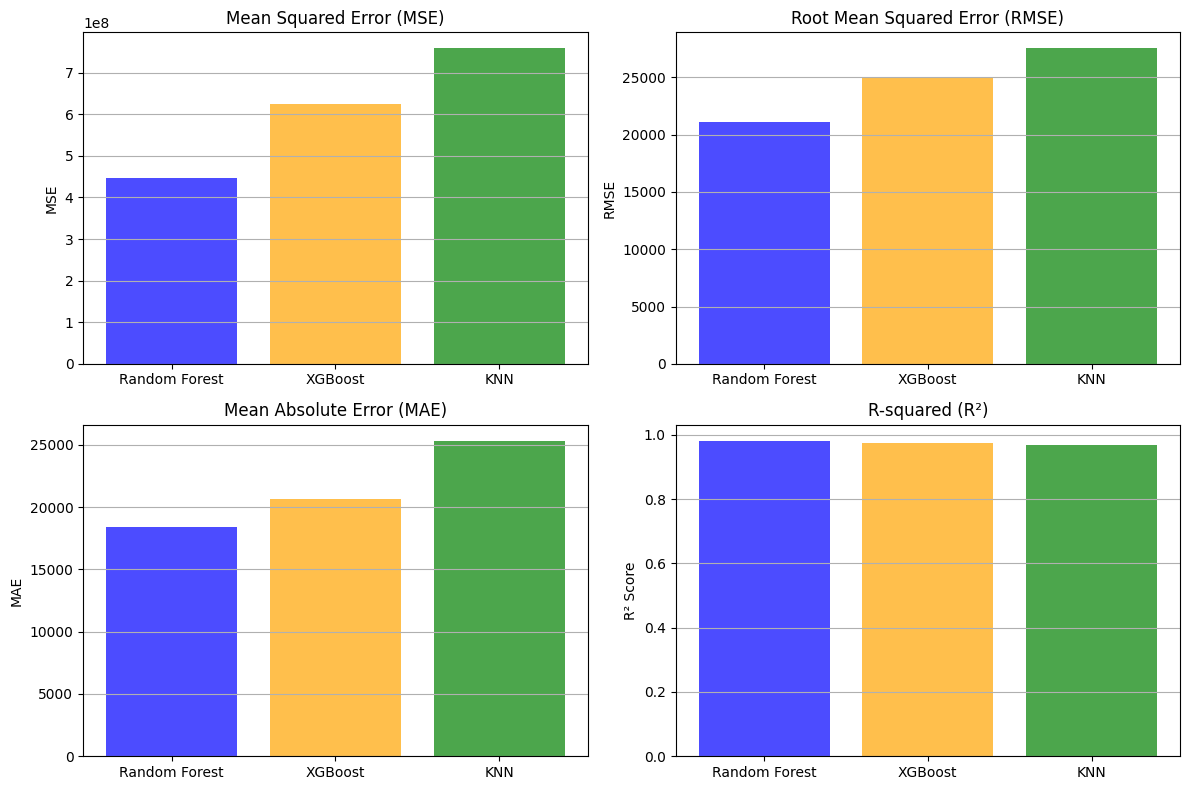

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Step 1: Create a dataset with house features and prices
data = {
    "Size (sq ft)": [1200, 1500, 1800, 2500, 1100, 1400, 1600, 2000, 2200, 3000,
                     800, 1000, 2700, 1900, 2100, 1700, 2300, 3200, 2800, 3500],
    "Bedrooms": [2, 3, 3, 4, 2, 3, 3, 4, 4, 5,
                 1, 2, 5, 3, 4, 3, 4, 5, 4, 5],
    "Age (years)": [10, 15, 20, 5, 25, 30, 15, 10, 8, 4,
                    50, 45, 3, 12, 7, 20, 6, 2, 9, 1],
    "Price (USD)": [200000, 250000, 300000, 400000, 150000, 220000, 270000, 350000, 370000, 500000,
                    100000, 120000, 480000, 320000, 400000, 290000, 450000, 600000, 500000, 700000]
}

# Convert the data dictionary into a Pandas DataFrame
df = pd.DataFrame(data)

# Step 2: Define features (X) and target variable (y)
X = df[["Size (sq ft)", "Bedrooms", "Age (years)"]]  # Features
y = df["Price (USD)"]  # Target variable

# Step 3: Normalize features using Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter tuning for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Step 5: Hyperparameter tuning for XGBoost
xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid=xgb_param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Step 6: Hyperparameter tuning for KNN
knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

knn_grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knn_param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Step 7: Evaluate the models on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_knn = best_knn_model.predict(X_test)

# Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Metrics for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Step 8: Compare the models visually
models = ["Random Forest", "XGBoost", "KNN"]
mse_values = [mse_rf, mse_xgb, mse_knn]
rmse_values = [rmse_rf, rmse_xgb, rmse_knn]
mae_values = [mae_rf, mae_xgb, mae_knn]
r2_values = [r2_rf, r2_xgb, r2_knn]

plt.figure(figsize=(12, 8))

# MSE comparison
plt.subplot(2, 2, 1)
plt.bar(models, mse_values, color=["blue", "orange", "green"], alpha=0.7)
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")
plt.grid(axis="y")

# RMSE comparison
plt.subplot(2, 2, 2)
plt.bar(models, rmse_values, color=["blue", "orange", "green"], alpha=0.7)
plt.title("Root Mean Squared Error (RMSE)")
plt.ylabel("RMSE")
plt.grid(axis="y")

# MAE comparison
plt.subplot(2, 2, 3)
plt.bar(models, mae_values, color=["blue", "orange", "green"], alpha=0.7)
plt.title("Mean Absolute Error (MAE)")
plt.ylabel("MAE")
plt.grid(axis="y")

# R-squared comparison
plt.subplot(2, 2, 4)
plt.bar(models, r2_values, color=["blue", "orange", "green"], alpha=0.7)
plt.title("R-squared (R²)")
plt.ylabel("R² Score")
plt.grid(axis="y")

plt.tight_layout()
plt.show()
